In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot
from scipy.sparse import csc_matrix
from gensim.models import Word2Vec

In [2]:
# Read files
df=pd.read_csv('will_play_text.csv',sep=';',header=None)
with open('play_names.txt','r') as f:
    plays = [line.rstrip('\n') for line in f]
with open('vocab.txt','r') as f:
    vocab = [line.rstrip('\n') for line in f]

In [3]:
# part 1
content = []
for i in plays:
    text = df[5][df[1] == i]
    content += [' '.join(text)]
# since by default the count vetorizer tokenize and lowercase the input str
cv = CountVectorizer(vocabulary=vocab)
tf = cv.transform(content)
td_matrix = np.transpose(tf)

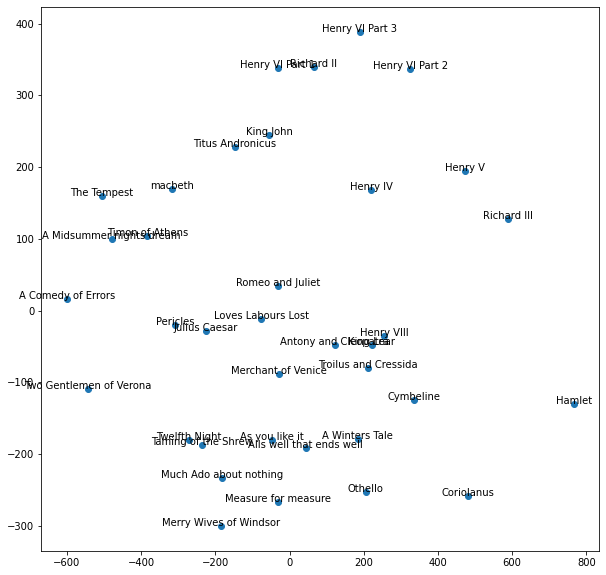

In [4]:
# part 2
pca = PCA(n_components=2)
result = pca.fit_transform(tf.toarray())
pyplot.rcParams['figure.figsize'] = [10, 10]
pyplot.scatter(result[:,0],result[:,1])
for i, name in enumerate(plays):
	pyplot.annotate(name, xy=(result[i, 0], result[i, 1]),ha='center')
pyplot.show()

In [5]:
# part 3
# since by default the vetorizer tokenize and lowercase the input str
v = TfidfVectorizer(vocabulary=vocab)
tf = v.fit_transform(content)
td_matrix = np.transpose(tf)

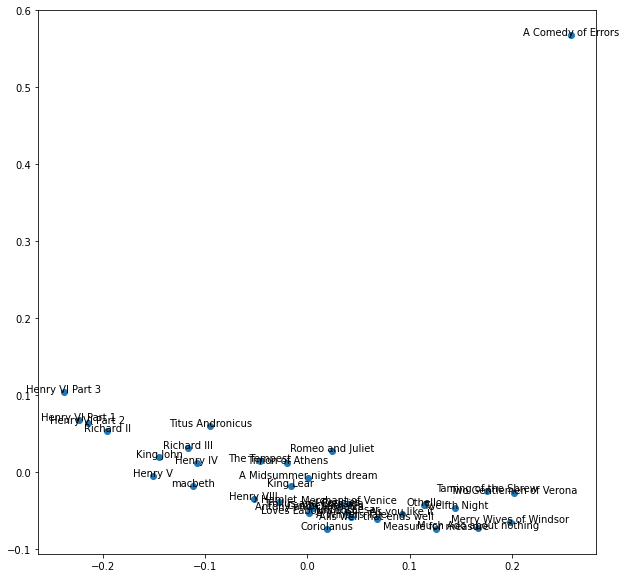

In [6]:
# part 4
pca = PCA(n_components=2)
result = pca.fit_transform(tf.toarray())
pyplot.scatter(result[:,0],result[:,1])
for i, name in enumerate(plays):
	pyplot.annotate(name, xy=(result[i, 0], result[i, 1]),ha='center')
pyplot.show()

In [7]:
# part 5
lw = cv.transform(df[5])
ww = (lw.T * lw)
ww.setdiag(0)

/usr/local/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [8]:
# part 6
nlp = spacy.load("en_core_web_sm")
processed = []
for i in content:
    doc = nlp(i)
    tokens = [token.text.lower() for token in doc]
    processed += [tokens]

In [ ]:
playv=csc_matrix((len(plays),len(vocab)),dtype = np.float64)
for i in range(len(processed)):
    vec = csc_matrix((1,len(vocab)),dtype = np.int64)
    c = 0
    for j in processed[i]:
        if j in vocab:
            c+=1
            vec += ww[vocab.index(j)]
    playv[i] = vec/c

In [9]:
come = ['The Tempest','Two Gentlemen of Verona','Merry Wives of Windsor','Measure for measure',
             'A Comedy of Errors','Much Ado about nothing','Loves Labours Lost','A Midsummer nights dream',
             'Merchant of Venice','As you like it','Taming of the Shrew','Alls well that ends well',
             'Twelfth Night','A Winters Tale','Pericles']
hist = ['King John','Richard II','Richard III','Henry IV','Henry V','Henry VI Part 1','Henry VI Part 2',
            'Henry VI Part 3','Henry VIII',]
trag = ['Troilus and Cressida','Coriolanus','Titus Andronicus','Romeo and Juliet','Timon of Athens',
            'Julius Caesar','macbeth','Hamlet','King Lear','Othello','Antony and Cleopatra','Cymbeline']


In [ ]:
comes,hists,trags=[],[],[]
for i in come:
    comes += [playv[plays.index(i)].toarray()[0]]
for i in hist:
    hists += [playv[plays.index(i)].toarray()[0]]
for i in trag:
    trags += [playv[plays.index(i)].toarray()[0]]
avgcomes = cosine_similarity(comes)
avghists = cosine_similarity(hists)
avgtrags = cosine_similarity(trags)
avg,c=0,0
print('Part 6')
for i in range(len(avgcomes)-1):
    for j in range(i+1,len(avgcomes)):
        c+=1
        avg+=avgcomes[i][j]
print('Avg pairwise similarities for comedies is',avg/c)
avg,c=0,0
for i in range(len(avghists)-1):
    for j in range(i+1,len(avghists)):
        c+=1
        avg+=avghists[i][j]
print('Avg pairwise similarities for histories is',avg/c)
avg,c=0,0
for i in range(len(avgtrags)-1):
    for j in range(i+1,len(avgtrags)):
        c+=1
        avg+=avgtrags[i][j]
print('Avg pairwise similarities for tragedies is',avg/c)

In [32]:
# part 7
model = Word2Vec(processed,size=100,min_count=1)
wv = model.wv
repres = [sum([wv[i] for i in j if wv.__contains__(i)])/sum([1 for i in j if wv.__contains__(i)]) if sum([1 for i in j if wv.__contains__(i)]) != 0 else np.zeros(100) for j in processed]
play_repres = np.stack(repres)
comes,hists,trags=[],[],[]
for i in come:
    comes += [play_repres[plays.index(i)]]
for i in hist:
    hists += [play_repres[plays.index(i)]]
for i in trag:
    trags += [play_repres[plays.index(i)]]
avgcomes = cosine_similarity(comes)
avghists = cosine_similarity(hists)
avgtrags = cosine_similarity(trags)

In [11]:
avg,c=0,0
for i in range(len(avgcomes)-1):
    for j in range(i+1,len(avgcomes)):
        c+=1
        avg+=avgcomes[i][j]
print('Part 7')
print('Avg pairwise similarities for comedies is',avg/c)
avg,c=0,0
for i in range(len(avghists)-1):
    for j in range(i+1,len(avghists)):
        c+=1
        avg+=avghists[i][j]
print('Avg pairwise similarities for histories is',avg/c)
avg,c=0,0
for i in range(len(avgtrags)-1):
    for j in range(i+1,len(avgtrags)):
        c+=1
        avg+=avgtrags[i][j]
print('Avg pairwise similarities for tragedies is',avg/c)

Avg pairwise similarities for comedies is 0.9988820723124913
Avg pairwise similarities for histories is 0.9990112417274051
Avg pairwise similarities for tragedies is 0.9989541389725425


In [12]:
# part 8
characters = list(set(df[4]))
characters.pop(0)
content = []
for i in characters:
    text = df[5][df[4] == i]
    content += [' '.join(text)]  

In [13]:
char_text = []
for i in content:
    doc = nlp(i)
    tokens = [token.text.lower() for token in doc]
    char_text += [tokens]

In [44]:
model = Word2Vec(char_text,size=100,min_count=1)
wv = model.wv
repres = [sum([wv[i] for i in j if wv.__contains__(i)])/sum([1 for i in j if wv.__contains__(i)]) if sum([1 for i in j if wv.__contains__(i)]) != 0 else np.zeros(100) for j in char_text]
char_repres = np.stack(repres)

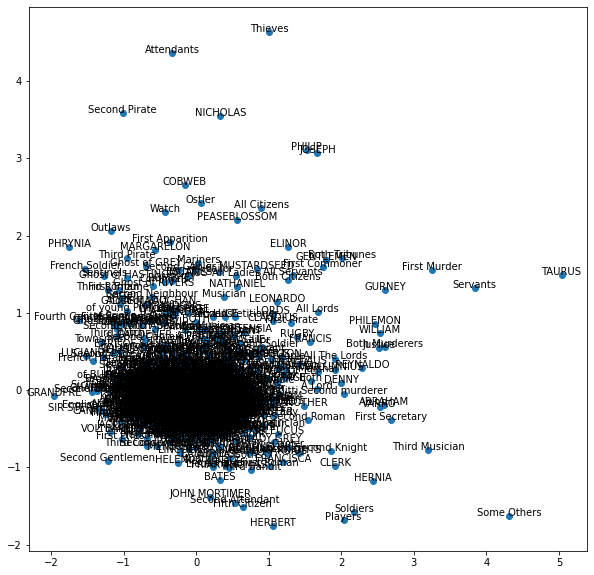

In [45]:
pca = PCA(n_components=2)
result = pca.fit_transform(char_repres)
pyplot.scatter(result[:,0],result[:,1])
for i, name in enumerate(characters):
	pyplot.annotate(name, xy=(result[i, 0], result[i, 1]),ha='center')
pyplot.show()

In [68]:
# part 9
names = ['JULIET','CORDELIA','IMOGEN','PAULINA','MIRANDA','PORTIA','MARIA','VIOLA','DESDEMONA',
         'ROMEO','HAMLET','OTHELLO','MACBETH','APEMANTUS','BANQUO','CALIBAN','TIMON','TROILUS']
index = [characters.index(i) for i in names]
new = result[index]

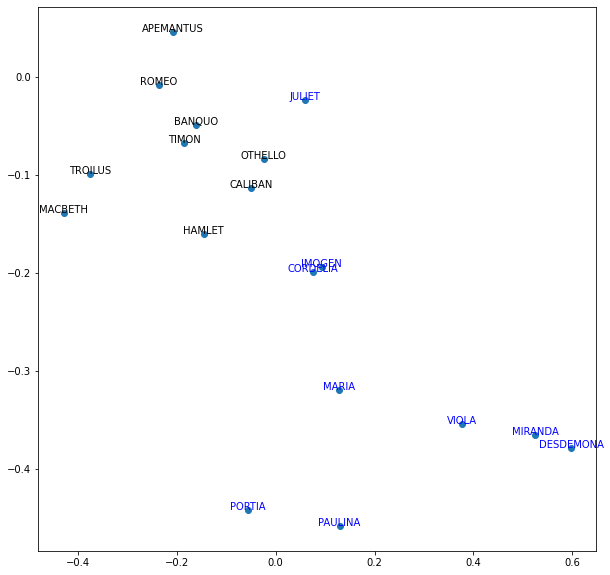

In [71]:
pyplot.scatter(new[:,0],new[:,1])
for i, name in enumerate(names):
    if i >8:
        pyplot.annotate(name, xy=(new[i, 0], new[i, 1]),ha='center',c='black')
    else:
        pyplot.annotate(name, xy=(new[i, 0], new[i, 1]),ha='center',c='blue')
pyplot.show()